# GARCH

Let's just play around a little bit

In [47]:
import numpy as np
import pandas as pd
import math
import arch
from typing import Literal

# local modules
from data_cleaning.import_data import import_data
from utils.plots import *
from utils.statistics import *

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
fx_pairs =[
    'USDRUB',
    'USDZAR',
    'USDBRL',
    'EURUSD',
    'USDJPY',
    'GBPUSD'
]
df = import_data(fx_pair='USDRUB')

dfs = { pair : import_data(fx_pair=pair) for pair in fx_pairs }

In [19]:
df

,v1m,v3m,v1y,px_last,px_bid,px_ask,log_ret,rolling_21d_realized_stdev
Dates,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-02-16,22.3250,20.4600,19.135,75.2695,75.2480,75.2910,-0.001288,0.016853
2022-02-17,25.6800,22.1175,19.895,76.3176,76.2880,76.3472,0.013829,0.001072
2022-02-18,26.5125,23.1300,20.575,77.3366,77.3102,77.3629,0.013264,0.006342


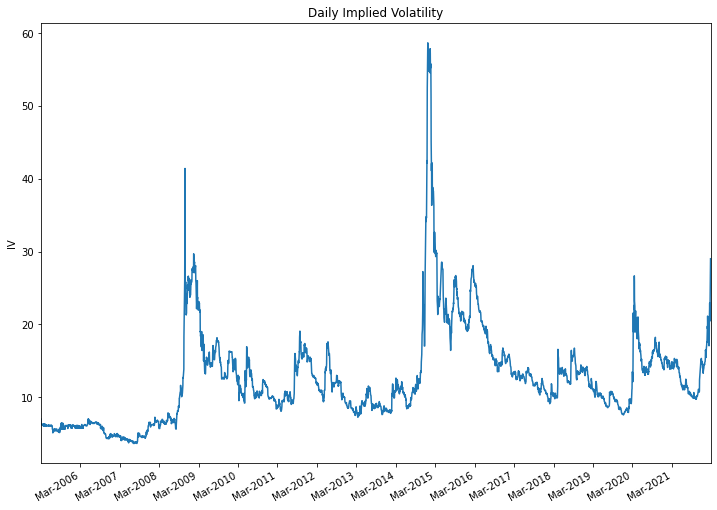

In [49]:
plot_iv(df=df,months_out='3m')

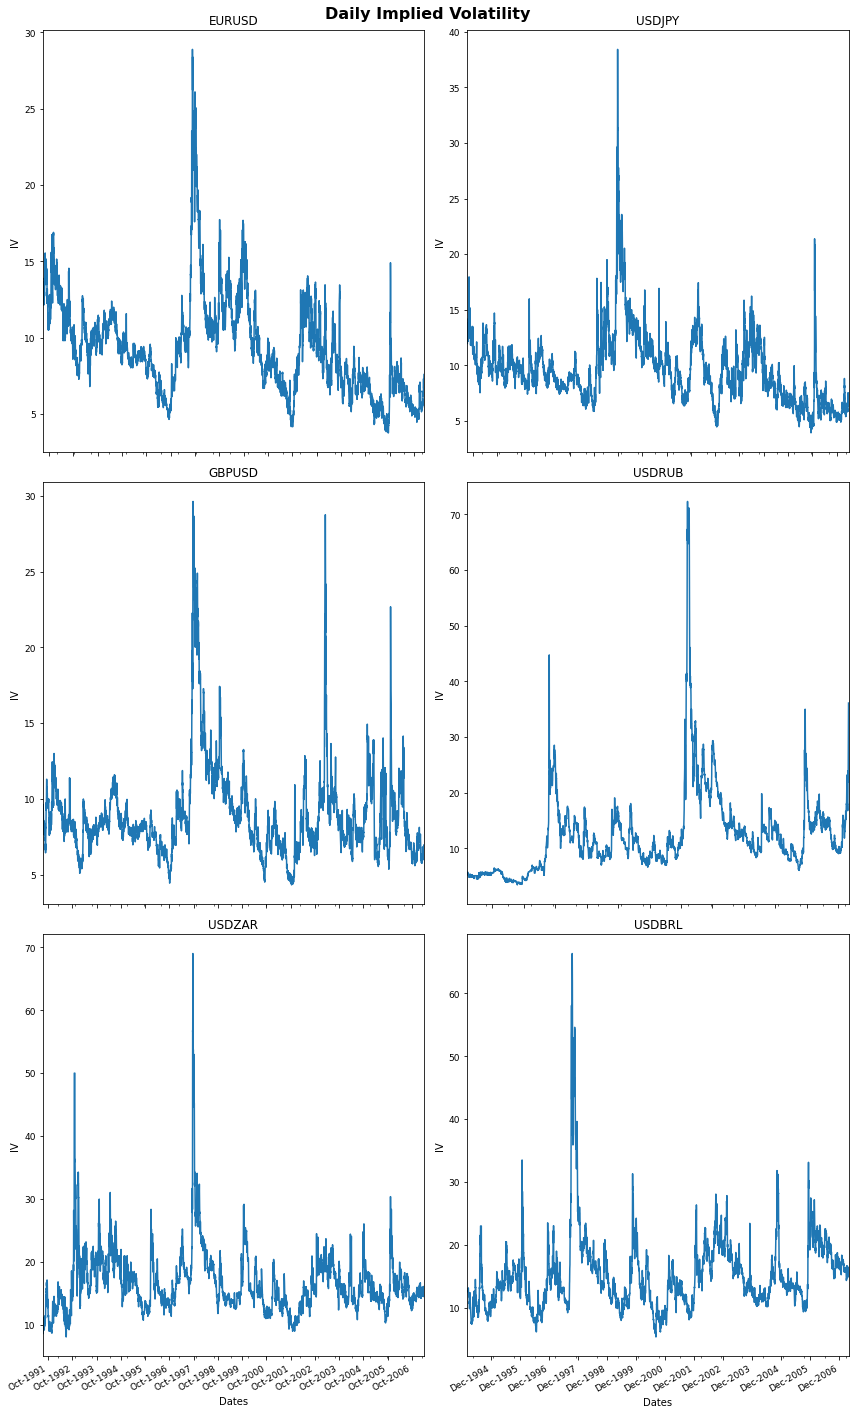

In [64]:
plot_grid(df_dict=dfs, series='v1m',cols=2)

## Descriptive Statistics

In [3]:
df['log_ret'].describe()

count    5760.000000
mean        0.000180
std         0.007844
min        -0.173462
25%        -0.002269
50%         0.000000
75%         0.002220
max         0.170009
Name: log_ret, dtype: float64

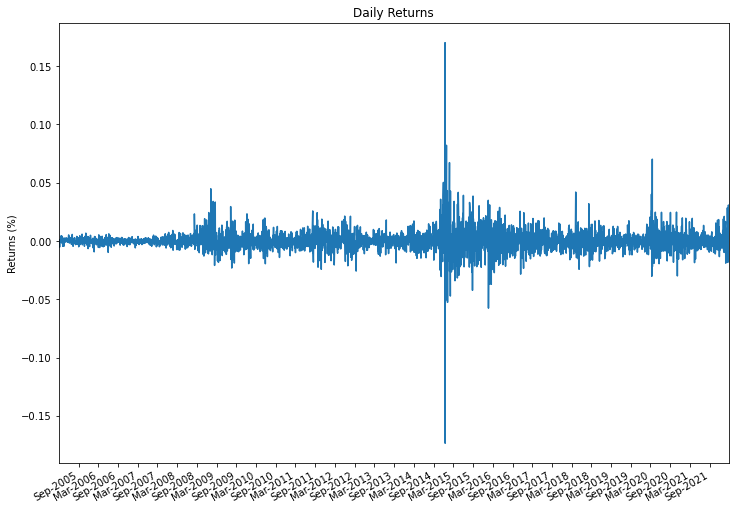

In [30]:
plot_returns(df.dropna())

########################
     Normality test     
########################
p = 0.00000
The null of normality can be rejected
#########################################################
     Are returns statistically signifcant from zero?     
#########################################################
Returns 
t=1.744, p=0.081
The null of zero-returns cannot be rejected
#########################
     Autocorrelation     
#########################


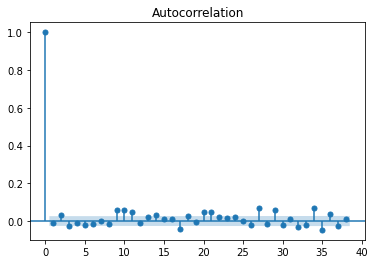

In [64]:
get_desctiptive_stats(df,plots=True)

fix below and put inside statistics.py

/Users/frederikp/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


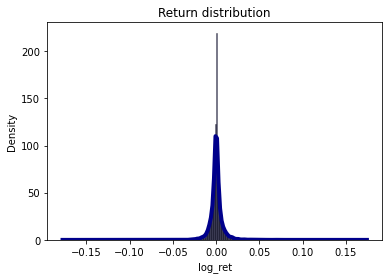

In [72]:
sns.distplot(df['log_ret'].dropna(), hist=True, kde=True, 
             bins=int(len(df.dropna().index)/10), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Return distribution')
plt.show()